----
## Step 1 :

#### • Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### • Setting plot style

In [2]:
custom_colours = ['#74a09e','#98e2c6','#f2a553','#c14953']
colours = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)
colours_cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set_theme(style="darkgrid",palette=custom_colours)

#### • Loading Dataset

In [3]:
raw_train_data = pd.read_csv('train.csv')
train_data = raw_train_data.copy()
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_test_data = pd.read_csv('test.csv')
test_data = raw_test_data.copy()
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----
## Step 2 : 

#### • Looking at our datas

In [5]:
train_data.shape

(42000, 785)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


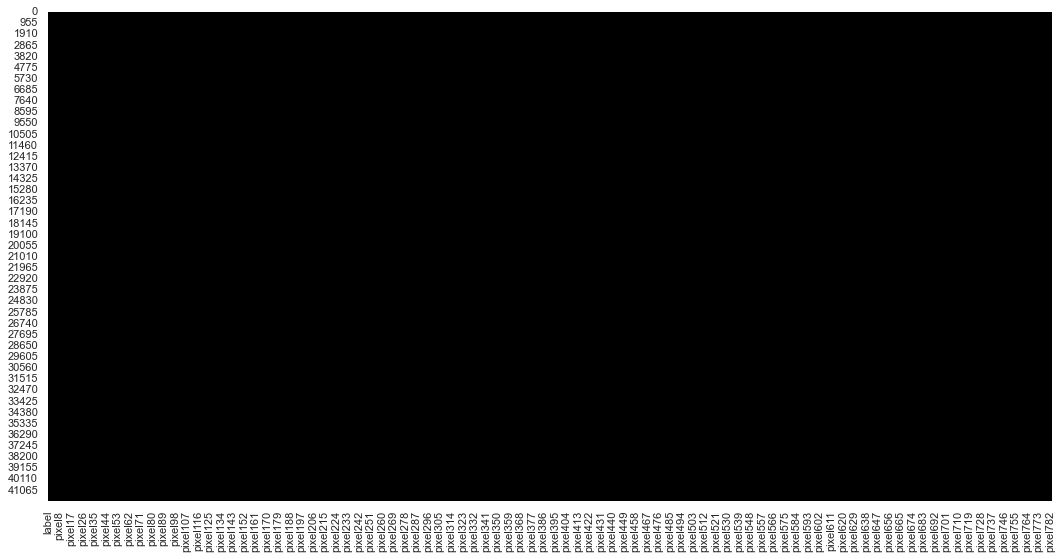

In [7]:
plt.figure(figsize=(18,9))
sns.heatmap(train_data.isna(),cbar=False,cmap=colours)
plt.show()

Il n'y a aucune donnée manquante.

----
## Step 3 :

In [8]:
target_label = 'label';
features = train_data.loc[:,train_data.columns != target_label].copy()
label = train_data[target_label].copy()

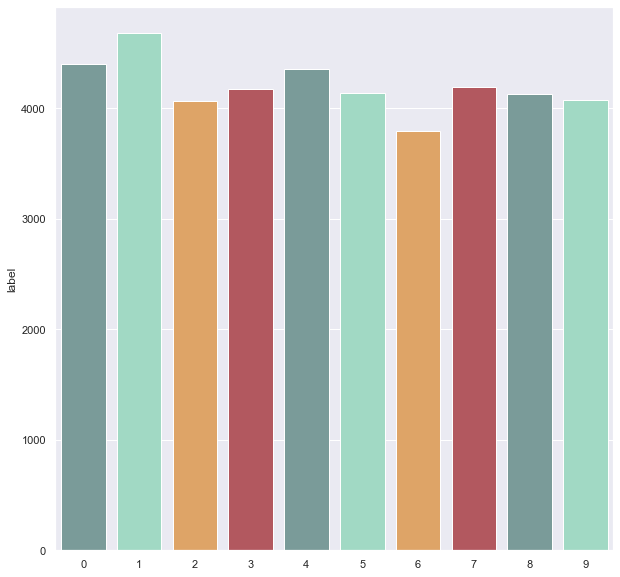

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [9]:
plt.figure(figsize=(10,10))
# plt.pie(label.value_counts(),labels=label.unique(),autopct='%1.1f%%')
# plt.bar(label.unique(),label.value_counts())
sns.barplot(x=label.unique(),y=label.value_counts(),palette=custom_colours)
plt.show()
print(label.value_counts())

Les données sont relativement bien équilibré avec environ 10% de valeurs par classe.

In [10]:
features['pixel400'].value_counts()

0      24771
253     3087
254     1821
252     1378
255      533
       ...  
69        19
158       18
117       17
88        11
78        10
Name: pixel400, Length: 256, dtype: int64

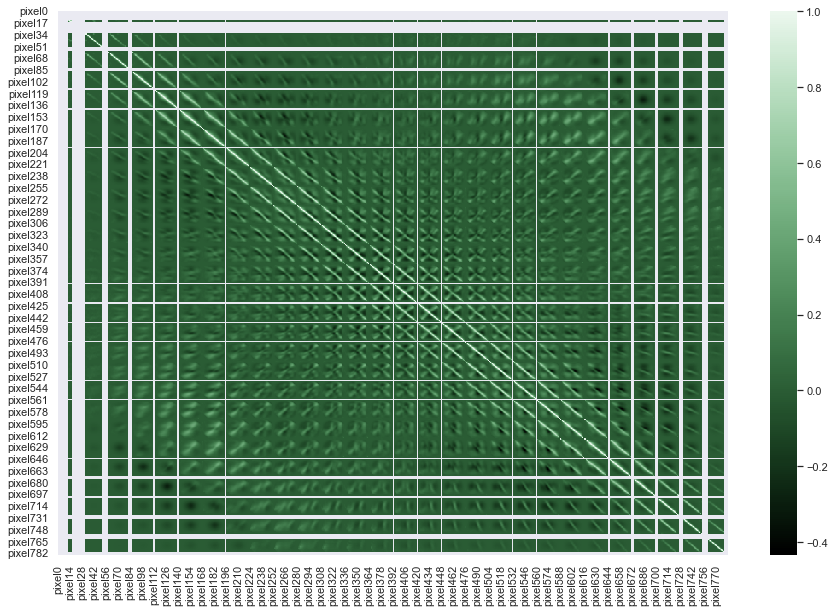

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(features.corr(),cmap=colours_cmap)
plt.show()

La relation entre les pixels particulièrement non corrélée, mais ceci n'est pas une surprise.

----
## Step 4 :

In [12]:
test_index = 150
first_row = features.iloc[test_index]
image_base = np.ndarray((28,28))
nb_pixel = len(first_row)
for pix in range(nb_pixel):
    image_base[int(pix/28)][(pix%28)] = first_row[pix]

On divise chaque valeurs par la valeurs maximum pour réduire l'échelle des valeurs à [0-1]

In [13]:
normalized_features = features/255
normalized_features['pixel400'].value_counts()

0.000000    24771
0.992157     3087
0.996078     1821
0.988235     1378
1.000000      533
            ...  
0.270588       19
0.619608       18
0.458824       17
0.345098       11
0.305882       10
Name: pixel400, Length: 256, dtype: int64

In [14]:
first_row = normalized_features.iloc[test_index]
image_norm = np.ndarray((28,28))
nb_pixel = len(first_row)
for pix in range(nb_pixel):
    image_norm[int(pix/28)][(pix%28)] = first_row[pix]

Transformation de l'image en Bitmap (taux d'acceptance 50%) afin d'alléger le traintement au détriment de la précision des données.

In [15]:
bitmapped_features = normalized_features.copy()
for col in bitmapped_features.columns:
    bitmapped_features.loc[bitmapped_features[col] >= .5,col] = 1
    bitmapped_features.loc[bitmapped_features[col] != 1,col] = 0
# bitmaped_features.loc[:,bitmaped_features >= .5] = 1
# df.loc[df.my_channel > 20000, 'my_channel'] = 0

In [16]:
bitmapped_features['pixel400'].value_counts()

0.0    29762
1.0    12238
Name: pixel400, dtype: int64

In [17]:
first_row = bitmapped_features.iloc[test_index]
image_bitmap = np.ndarray((28,28))
nb_pixel = len(first_row)
for pix in range(nb_pixel):
    image_bitmap[int(pix/28)][(pix%28)] = first_row[pix]

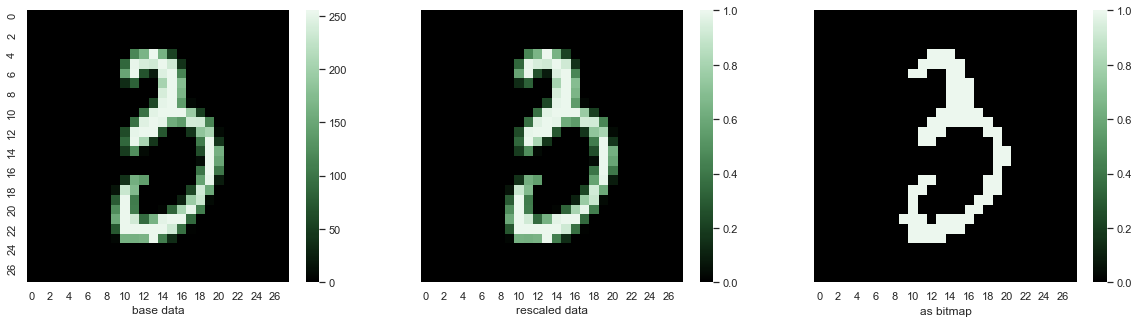

In [18]:
fig, ax = plt.subplots(1,3,figsize=(20,5),sharey=True)
sns.heatmap(image_base,ax=ax[0],cmap=colours_cmap)
ax[0].set_xlabel("base data")
sns.heatmap(image_norm,ax=ax[1],cmap=colours_cmap)
ax[1].set_xlabel("rescaled data")
sns.heatmap(image_bitmap,ax=ax[2],cmap=colours_cmap)
ax[2].set_xlabel("as bitmap")
plt.show()

On obsever ici 3 fois la même image avec les données de base (gauche) les données remis à l'échelle (milieu) et la version bitmap (droite).
Sans surprise la remise à l'échelle ne change pas la précision des données, cependant on remaque une perte d'information avec la bitmap, mais les données étant binaire, la vitesse de traitement est grandement supérieur à celle des données de base.

----
## Step 5 - 6 :

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc

svc_linear = SVC(kernel='linear')
svc_poly = SVC(kernel='poly')
svc_rbf = SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(normalized_features,label,train_size=.2,random_state=666)

svc_linear.fit(X_train,y_train)
svc_poly.fit(X_train,y_train)
svc_rbf.fit(X_train,y_train)

SVC()

In [20]:
linear_pred = svc_linear.predict(X_test)
print(classification_report(y_test,linear_pred))
conf_matrix_linear = confusion_matrix(y_test,linear_pred)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3334
           1       0.94      0.98      0.96      3713
           2       0.89      0.91      0.90      3309
           3       0.86      0.89      0.87      3473
           4       0.91      0.93      0.92      3298
           5       0.88      0.85      0.86      3072
           6       0.95      0.94      0.94      3296
           7       0.93      0.93      0.93      3524
           8       0.93      0.83      0.88      3291
           9       0.89      0.87      0.88      3290

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



In [21]:
poly_pred = svc_poly.predict(X_test)
print(classification_report(y_test,poly_pred))
conf_matrix_poly = confusion_matrix(y_test,poly_pred)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3334
           1       0.91      0.99      0.94      3713
           2       0.96      0.94      0.95      3309
           3       0.95      0.93      0.94      3473
           4       0.96      0.95      0.96      3298
           5       0.94      0.95      0.94      3072
           6       0.96      0.97      0.97      3296
           7       0.96      0.95      0.95      3524
           8       0.96      0.91      0.93      3291
           9       0.94      0.94      0.94      3290

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



In [22]:
rbf_pred = svc_rbf.predict(X_test)
print(classification_report(y_test,rbf_pred))
conf_matrix_rbf = confusion_matrix(y_test,rbf_pred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3334
           1       0.97      0.98      0.98      3713
           2       0.95      0.96      0.95      3309
           3       0.95      0.94      0.94      3473
           4       0.96      0.96      0.96      3298
           5       0.96      0.95      0.95      3072
           6       0.96      0.98      0.97      3296
           7       0.96      0.95      0.96      3524
           8       0.96      0.94      0.95      3291
           9       0.94      0.95      0.94      3290

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600



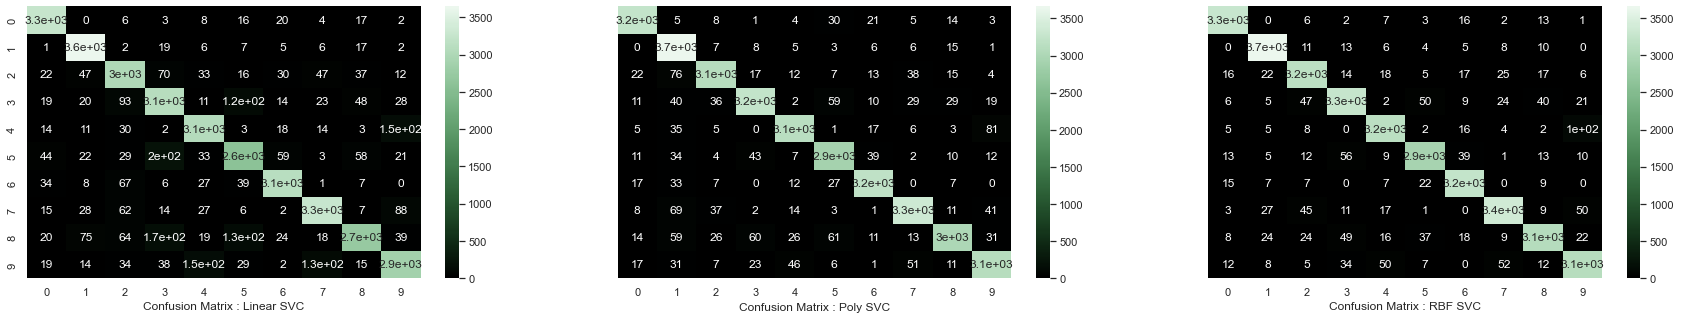

In [23]:
fig, ax = plt.subplots(1,3,figsize=(30,5),sharey=True)
sns.heatmap(conf_matrix_linear,annot=True,ax=ax[0],cmap=colours_cmap)
ax[0].set_xlabel("Confusion Matrix : Linear SVC")
sns.heatmap(conf_matrix_poly,annot=True,ax=ax[1],cmap=colours_cmap)
ax[1].set_xlabel("Confusion Matrix : Poly SVC")
sns.heatmap(conf_matrix_rbf,annot=True,ax=ax[2],cmap=colours_cmap)
ax[2].set_xlabel("Confusion Matrix : RBF SVC")
plt.show()

Matrice de confusion des 3 noyaux en gardant le reste des paramètres par défaut, on remaque que bien que les résultats sont meilleurs avec le noyaux RBF, les autres ont tout de même des résultats plus que satisfaisant. Ce pendant c'est ce dernier que nous utiliseront pour la suite.

----
## Step 7 :

#### Ne pas lancer la Cellule à moins d'avoir un bon processeur et d'être armé de patience !
- elle met environ 32min a s'éxécuter sur un pc de qualité ( j'épargne les détails technique du cpu)

In [110]:
from sklearn.model_selection import GridSearchCV, KFold

params = dict(gamma=['scale','auto'],shrinking=[True,False],class_weight=[None,'balanced'],decision_function_shape=['ovr','ovo'])
estimator = SVC(kernel='rbf')

cv_sets = KFold(n_splits=10, shuffle=True, random_state=666)
gridsearch = GridSearchCV(estimator, params, cv=cv_sets, scoring='accuracy', 
verbose=2)

gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.5s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.9s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.8s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.8s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.8s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.7s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.8s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=   9.9s
[CV] END class_weight=None, decision_function_shape=ovr, gamma=scale, shrinking=True; total time=

GridSearchCV(cv=KFold(n_splits=10, random_state=666, shuffle=True),
             estimator=SVC(),
             param_grid={'class_weight': [None, 'balanced'],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=2)

In [114]:
best_estimator = gridsearch.best_estimator_
best_params = gridsearch.best_params_
best_params

{'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'shrinking': True}

Suite à la validation croisée nous avons récupéré les hyper-paramètres optimaux, nous pouvons constater que les ingénieurs de la bibliothèque Scikit Learn savent bien ce qu'ils font puisque ce ne sont que les paramètres par défaut qui ont été retenu (en notant que même le noyau RBF est la valeur par défaut si celle ci n'est pas précisée)

----

In [25]:
b_estimator = SVC(kernel='rbf',class_weight=None,decision_function_shape='ovr',gamma='scale',shrinking=True)
b_estimator.fit(X_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3334
           1       0.97      0.98      0.98      3713
           2       0.95      0.96      0.95      3309
           3       0.95      0.94      0.94      3473
           4       0.96      0.96      0.96      3298
           5       0.96      0.95      0.95      3072
           6       0.96      0.98      0.97      3296
           7       0.96      0.95      0.96      3524
           8       0.96      0.94      0.95      3291
           9       0.94      0.95      0.94      3290

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600



<AxesSubplot:>

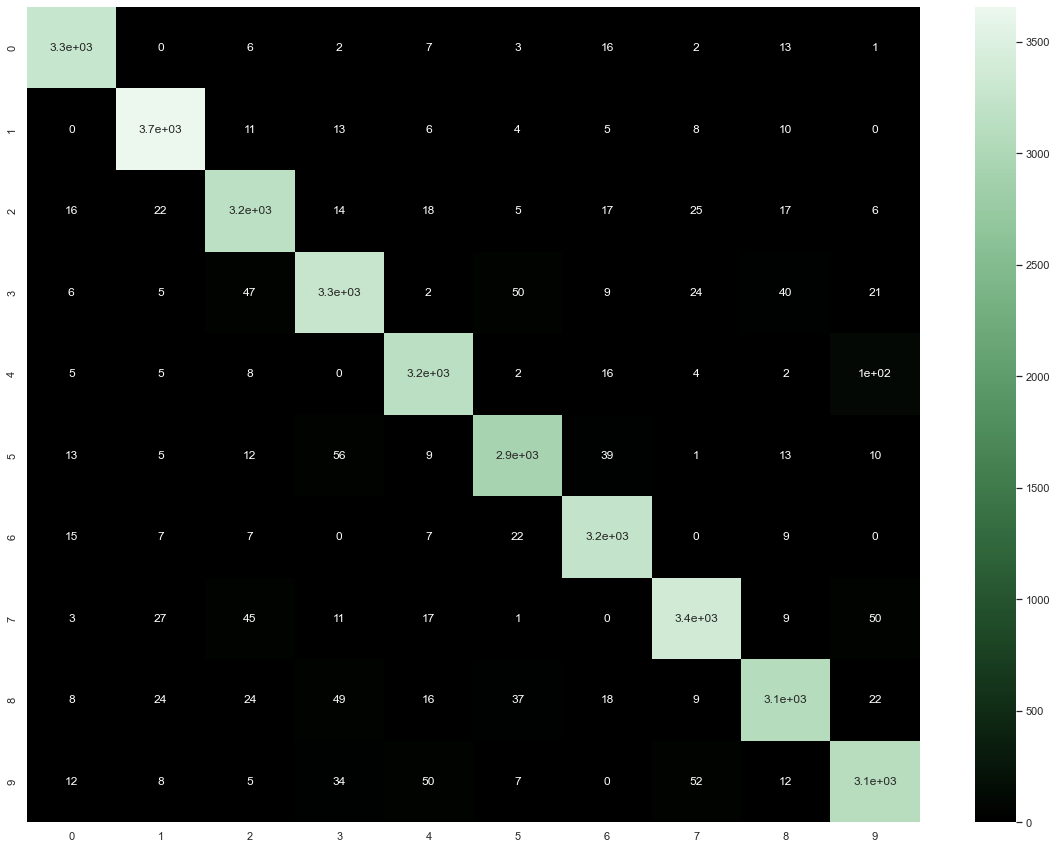

In [29]:
b_pred = b_estimator.predict(X_test)
print(classification_report(y_test,b_pred))
b_conf_matrix= confusion_matrix(y_test,b_pred)
plt.figure(figsize=(20,15))
sns.heatmap(b_conf_matrix,annot=True,cmap=colours_cmap)

On constate donc aucun changement de qualité du modèle suite à l'application d'une validation croisée.